## Customer Churn Prediction

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

## Data preprocessing and EDA

In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
df.shape

(10000, 14)

In [7]:
# description about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# checking for the null values in the dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# statistics about the dataset
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [10]:
# now i am going to remove irrelevalent or not usable columns from the dataset
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
df = pd.get_dummies(df,drop_first=True)

In [15]:
# handling imbalanced data with SMOTE

In [16]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [18]:
!pip install imblearn



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [21]:
X_res,y_res = SMOTE().fit_resample(X,y)

## now spliting the dataset into training and testing set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [24]:
# feature scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc= StandardScaler()

In [27]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[-0.58934602,  0.80523278,  1.17574933, ...,  1.32551085,
        -0.63781041, -1.22654924],
       [ 1.10234372,  0.10099958, -1.39847549, ..., -0.75442612,
        -0.63781041,  0.81529544],
       [ 0.39930383,  0.40281381,  0.80800293, ...,  1.32551085,
         1.56786403,  0.81529544],
       ...,
       [ 0.20157386,  0.20160432,  1.17574933, ..., -0.75442612,
        -0.63781041,  0.81529544],
       [ 0.5640788 ,  0.50341855,  0.07251012, ...,  1.32551085,
        -0.63781041,  0.81529544],
       [ 0.5311238 ,  1.00644227, -1.39847549, ...,  1.32551085,
        -0.63781041,  0.81529544]])

## logistic regression 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred1 = lr.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.778405524168236
0.7675300063171194
0.7823567289117836
0.774872448979592


In [35]:
  # Accuracy using the logistic regression is 86%

## SVC

In [36]:
from sklearn import svm

In [37]:
svm = svm.SVC()

In [38]:
svm.fit(X_train,y_train)

SVC()

In [39]:
y_pred2 = svm.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred2)

0.8418079096045198

In [41]:
precision_score(y_test,y_pred2)

0.8457481872116018

## KNeighbors Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred3 = knn.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred3)

0.8198367859384809

In [47]:
precision_score(y_test,y_pred3)

0.8065122103944896

## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier()

In [50]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred5 = rf.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred5)

0.8666038920276209

In [53]:
precision_score(y_test,y_pred5)

0.8667100130039012

## Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier


In [55]:
gbc = GradientBoostingClassifier()


In [56]:
gbc.fit(X_train,y_train)


GradientBoostingClassifier()

In [57]:
y_pred6 = gbc.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred6)

0.8408662900188324

In [59]:
precision_score(y_test,y_pred6)


0.844078947368421

In [60]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [61]:
final_data

,Models,ACC
0,LR,0.778406
1,SVC,0.841808
2,KNN,0.819837
3,RF,0.866604
4,GBC,0.840866


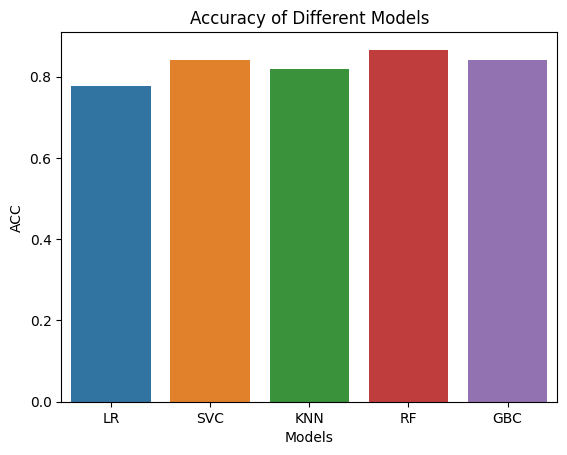

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_data is your DataFrame with 'Models' and 'ACC' columns

sns.barplot(x='Models', y='ACC', data=final_data)
plt.title('Accuracy of Different Models')
plt.show()


In [63]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','RF','GBC'],
                        'PRE':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred5),
                              precision_score(y_test,y_pred6)]})

In [64]:
final_data

,Models,PRE
0,LR,0.767530
1,SVC,0.845748
2,KNN,0.806512
3,RF,0.866710
4,GBC,0.844079


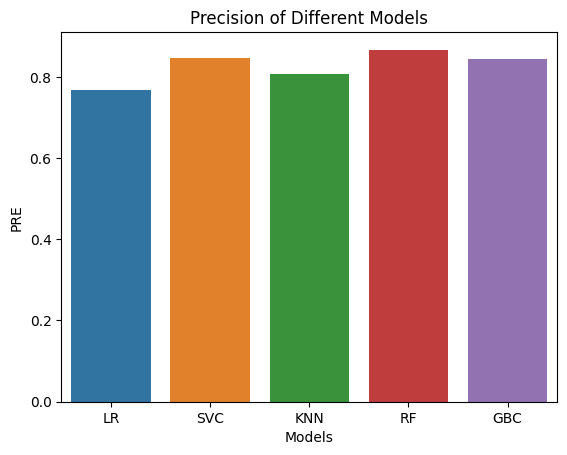

In [65]:
sns.barplot(x='Models', y='PRE', data=final_data)
plt.title('Precision of Different Models')
plt.show()

## Model Saving

In [66]:
X_res=sc.fit_transform(X_res)

In [67]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [68]:
import joblib

In [69]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [70]:
model = joblib.load('churn_predict_model')

In [71]:
df.columns


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [72]:


# Assuming rf is your trained RandomForestClassifier

# Create a DataFrame with the same structure as your training data
prediction_data = pd.DataFrame([[619, 42, 2, 0.0, 0, 0, 0, 101348.88, 0, 0, 0]],
                               columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                                        'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
                                        'Geography_Germany', 'Geography_Spain', 'Gender_Male'])

# Make predictions using the trained model
predictions = rf.predict(prediction_data)

# Print the predictions
print(predictions)


[1]


C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [73]:
ans = model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

In [75]:
print (ans)

[1]
